# Fashion MNIST Classification with CNN

This notebook demonstrates how to build a Convolutional Neural Network (CNN) to classify Fashion MNIST images. Fashion MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

## Step 1: Import Required Libraries

First, we import the necessary libraries:
- pandas: for data manipulation and analysis
- numpy: for numerical operations
- matplotlib: for data visualization
- tensorflow.keras: for building and training neural networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

## Step 2: Load the Dataset

Load the Fashion MNIST dataset from CSV files. The dataset is already split into training and testing sets. Each CSV file contains the pixel values (784 columns representing a flattened 28x28 image) and a label column.

In [2]:
train_df = pd.read_csv('datasets/fashion-mnist_train.csv')
test_df = pd.read_csv('datasets/fashion-mnist_test.csv')

## Step 3: Inspect the Dataset

Examine the dataset to understand its structure, distribution, and check for any missing values or anomalies. This helps us understand what we're working with before preprocessing.

In [3]:
print(train_df.shape)
print(train_df.describe())

(60000, 785)
              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188     

In [4]:
print(train_df.info())
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [5]:
print("Unique Labels:", train_df.label.unique())

Unique Labels: [2 9 6 0 3 4 5 8 7 1]


## Step 4: Define Label Names

Create a mapping of numerical labels to clothing item names for better readability and interpretation of results.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Step 5: Prepare Data

Process the raw data to make it suitable for CNN training:
1. Separate features (pixel values) from labels
2. Reshape the flattened pixel arrays into 28×28 images with a single channel
3. Normalize pixel values to be between 0 and 1 (divide by 255)

These preprocessing steps are essential for efficient training and better performance.

In [7]:
# Separate features and labels, reshape 784 pixels into 28x28 images, and normalize (divide by 255)
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df['label'].values

## Step 6: Visualize Sample Images

Visualize a subset of training images to better understand the data. This helps us confirm that the images are loaded correctly and get a feel for what the model will be trained on.

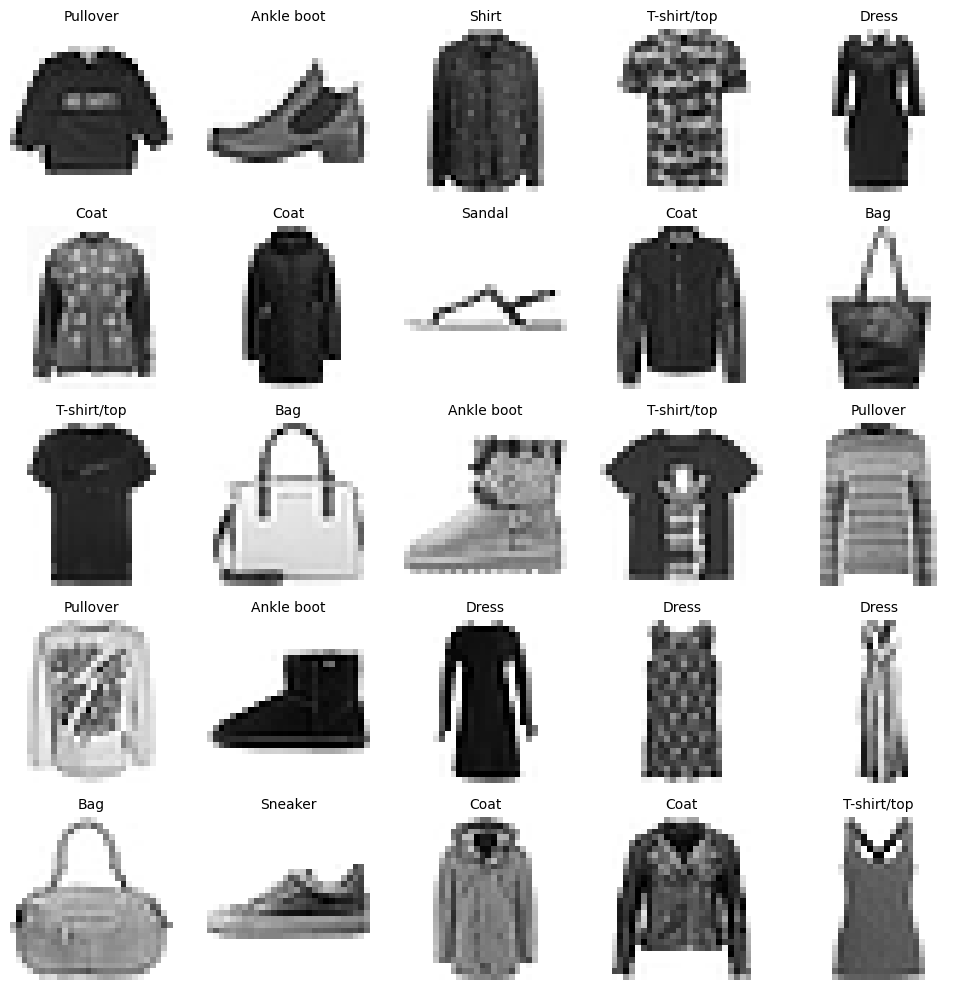

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.title(f"{class_names[y_train[i]]}", fontsize=10)
plt.tight_layout()
plt.show()

## Step 7: Build a CNN Model

Create a Convolutional Neural Network architecture for image classification:
1. Conv2D layer with 32 filters to extract features from the images
2. MaxPooling2D layer to reduce spatial dimensions
3. Flatten layer to convert 3D feature maps to 1D feature vectors
4. Dense output layer with softmax activation for 10-class classification

This simple CNN architecture is effective for basic image classification tasks.

In [9]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # Explicit Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

## Step 8: Compile the Model

Configure the model for training by specifying:
- Optimizer: Adam, an efficient stochastic gradient descent algorithm
- Loss function: sparse_categorical_crossentropy, appropriate for integer labels
- Metrics: accuracy, to monitor classification performance

These choices are standard for multi-class classification problems.

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 9: Train the Model

Train the compiled model on the training data for 5 epochs with batches of 64 samples. We also validate on the test data after each epoch to monitor for overfitting.

In [11]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7656 - loss: 0.6759 - val_accuracy: 0.8748 - val_loss: 0.3685
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8768 - loss: 0.3562 - val_accuracy: 0.8909 - val_loss: 0.3233
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8917 - loss: 0.3091 - val_accuracy: 0.8974 - val_loss: 0.3001
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8999 - loss: 0.2871 - val_accuracy: 0.9006 - val_loss: 0.2917
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9067 - loss: 0.2704 - val_accuracy: 0.9060 - val_loss: 0.2765


## Step 10: Model Summary

Display a summary of the model architecture, showing layer details and parameter counts. This helps us understand the complexity and structure of our CNN.

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

## Step 11: Evaluate the Model

Evaluate the trained model on the test set to get an unbiased estimate of its performance. This provides the final accuracy metric that reflects how well the model generalizes to new data.

In [13]:
accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy[1]:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9030 - loss: 0.2827
Test Accuracy: 0.91


## Step 12: Make Predictions

Use the trained model to make predictions on the test set:
1. Get probability distributions for each class
2. Convert probabilities to class labels by taking the argmax

This allows us to see how the model classifies new examples.

In [14]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Step 13: Visualize Predictions

Visualize test images alongside their predicted labels. This helps us understand where the model succeeds and where it might be making mistakes.

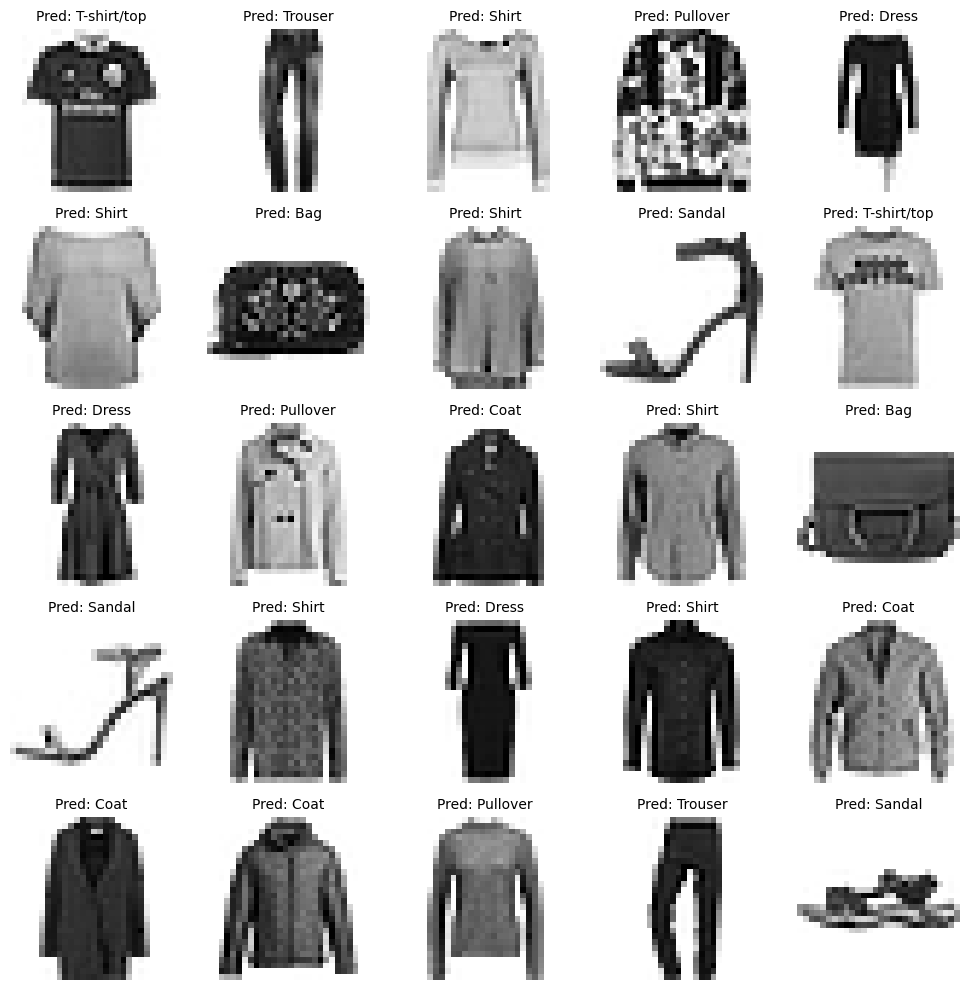

In [15]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.title(f"Pred: {class_names[y_pred[i]]}", fontsize=10)
plt.tight_layout()
plt.show()

## Step 14: Plot Learning Curves (Optional)

Visualize the model's learning progress by plotting training and validation metrics over epochs. This helps us identify potential overfitting or underfitting.

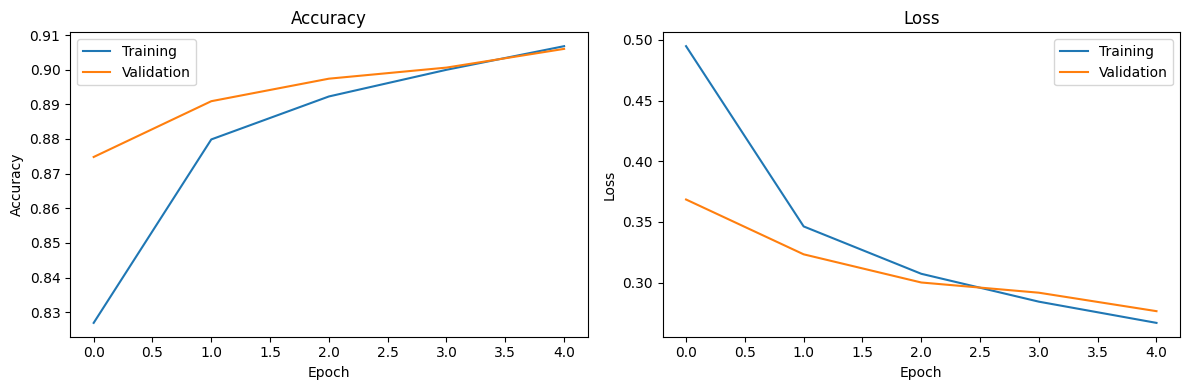

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Step 15: Confusion Matrix (Optional)

Create a confusion matrix to visualize the model's performance across all classes. This helps identify which classes are frequently confused with each other.

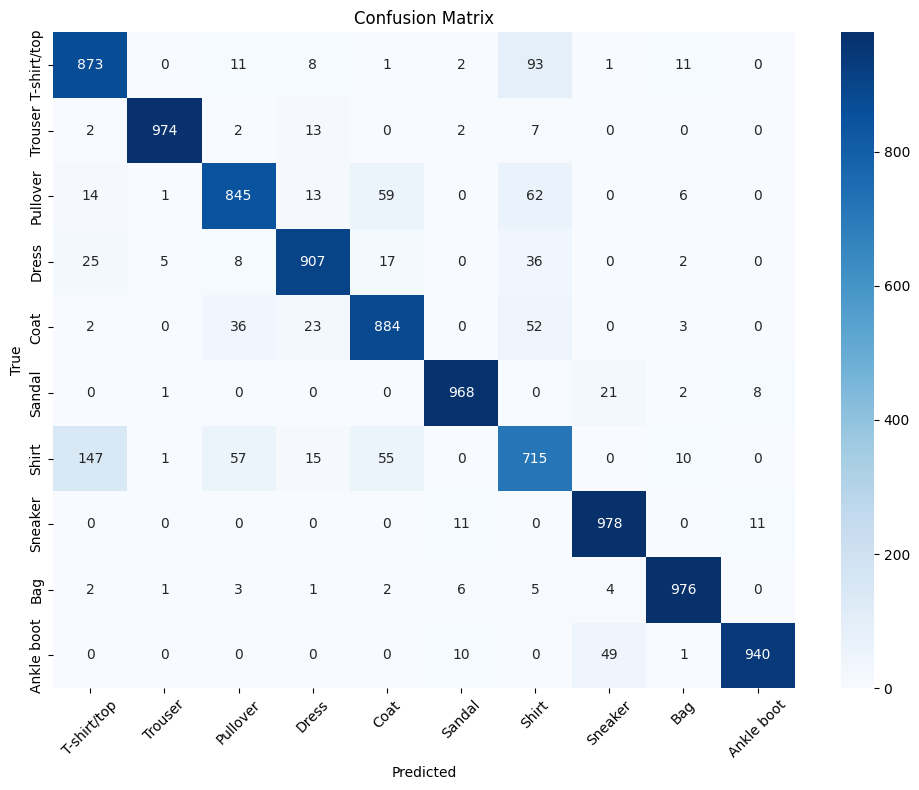

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 16: Save Model (Optional)

Save the trained model to disk for future use without retraining.

In [19]:
model.save('fashion_mnist_cnn_model.h5')
print("Model saved to disk")

Model saved to disk


In [23]:
from tensorflow.keras.saving import savemodel
(savemodelmodel, "fashion.keras")
print("model saved")

ImportError: cannot import name 'savemodel' from 'tensorflow.keras.saving' (C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\_tf_keras\keras\saving\__init__.py)

model.save("fashion.keras")